This file serves the purpose of testing the CSTR_model_plus.py CSTRRLEnv

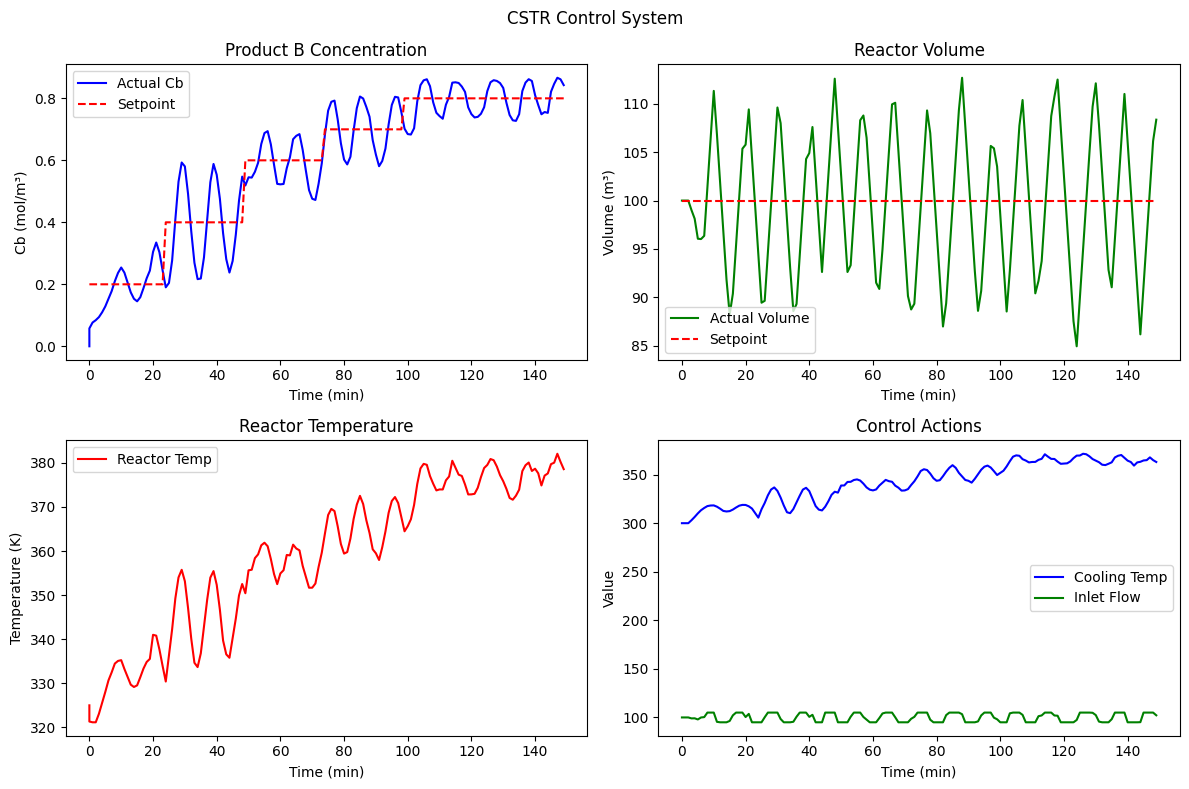

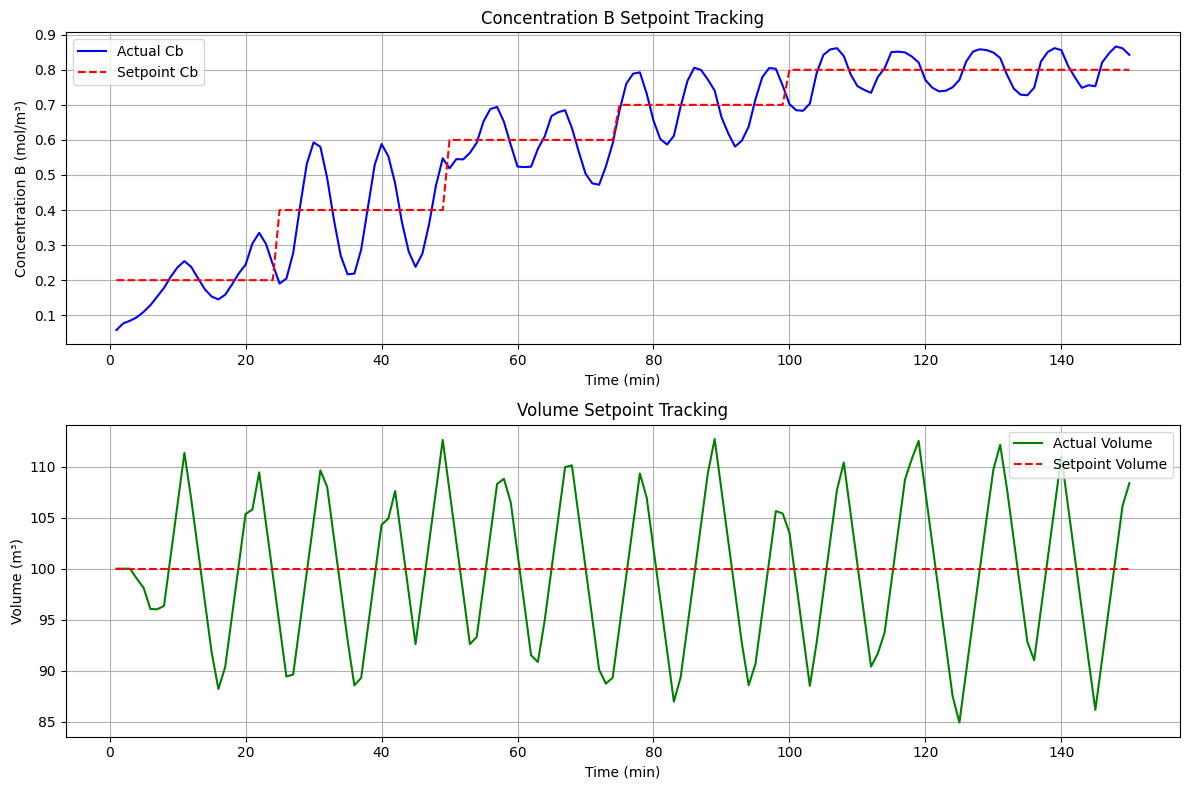

Simulation completed with setpoint tracking!


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from CSTR_model_plus import CSTRRLEnv, PID_velocity

def main():
    # Create environment with setpoint tracking
    env = CSTRRLEnv(
        simulation_steps=150,  
        dt=1.0,
        uncertainty_level=0.1,
        noise_level=0.02,
        enable_disturbances=True
    )
    
    # Define setpoints for tracking
    setpoints_Cb = [0.2, 0.4, 0.6, 0.7, 0.8]       # Concentration B setpoints
    setpoints_V = [100, 100, 100, 100, 100]        # Volume setpoints
    setpoint_durations = [25, 25, 25, 25, 25, 25]  # 25 timesteps per setpoint
    
    # Reset environment with custom setpoints
    obs, _ = env.reset(options={
        'setpoints_Cb': setpoints_Cb,
        'setpoints_V': setpoints_V,
        'setpoint_durations': setpoint_durations
    })
    
    # Fixed PID gains for this example
    # In a real RL application, these would be learned by the agent
    fixed_pid_gains = np.array([25., 0.7791, 0.0200, 0.7432, 0.7561, 0.0977])  # Optimal gains
    
    action = np.zeros(6)  # Normalized action space is [-1, 1]
    
    # Convert fixed PID gains to normalized action space
    action = 2.0 * (fixed_pid_gains - env.pid_lower) / (env.pid_upper - env.pid_lower) - 1.0
    
    # Run simulation with fixed controller
    done = False
    rewards = []
    cb_values = []
    cb_setpoints = []
    v_values = []
    v_setpoints = []
    time_values = []
    
    while not done:
        # Take a step with our fixed PID controller
        obs, reward, done, _, info = env.step(action)
        
        # Store data for plotting
        rewards.append(reward)
        cb_values.append(info['true_state'][1])  # Concentration B
        cb_setpoints.append(info['setpoint_Cb'])
        v_values.append(info['true_state'][4])   # Volume
        v_setpoints.append(info['setpoint_V'])
        time_values.append(len(cb_values))
        
        # Render the current state
        env.render()
    
    # Plot results after simulation
    plt.figure(figsize=(12, 8))
    
    # Plot Concentration B
    plt.subplot(2, 1, 1)
    plt.plot(time_values, cb_values, 'b-', label='Actual Cb')
    plt.plot(time_values, cb_setpoints, 'r--', label='Setpoint Cb')
    plt.legend()
    plt.title('Concentration B Setpoint Tracking')
    plt.xlabel('Time (min)')
    plt.ylabel('Concentration B (mol/m³)')
    plt.grid(True)
    
    # Plot Volume
    plt.subplot(2, 1, 2)
    plt.plot(time_values, v_values, 'g-', label='Actual Volume')
    plt.plot(time_values, v_setpoints, 'r--', label='Setpoint Volume')
    plt.legend()
    plt.title('Volume Setpoint Tracking')
    plt.xlabel('Time (min)')
    plt.ylabel('Volume (m³)')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    # Clean up
    env.close()
    
    print("Simulation completed with setpoint tracking!")

if __name__ == "__main__":
    main()